In [1]:
# !pip install wordninja autocorrect

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
from nltk.corpus import stopwords
import pprint

# from autocorrect import Speller

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberguard-ai-hackathon/train.csv
/kaggle/input/cyberguard-ai-hackathon/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/cyberguard-ai-hackathon/train.csv')
test = pd.read_csv('/kaggle/input/cyberguard-ai-hackathon/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [6]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [7]:
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [8]:
print(train['category'].value_counts())
print(len(train['category'].unique()))
print(train['sub_category'].value_counts())
print(len(train['sub_category'].unique()))

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
15
sub_category
UPI Related Frauds 

In [9]:
print(test['category'].value_counts())
print(len(test['category'].unique()))
print(test['sub_category'].value_counts())
print(len(test['sub_category'].unique()))

category
Online Financial Fraud                                  18896
Online and Social Media Related Crime                    4139
Any Other Cyber Crime                                    3670
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 912
Sexually Obscene material                                 666
Hacking  Damage to computercomputer system etc            592
Sexually Explicit Act                                     535
Cryptocurrency Crime                                      166
Online Gambling  Betting                                  134
Child Pornography CPChild Sexual Abuse Material CSAM      123
Online Cyber Trafficking                                   61
Cyber Terrorism                                            52
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: int64
15
sub_category
UPI Related Frauds 

In [10]:
train[train['sub_category'] == 'Other'].head()

,category,sub_category,crimeaditionalinfo
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as Army officer msg us that he want our place on rent and for that to confirm the account he wants us to transfer Re in his account and once confirmed he will transfer back
11,Any Other Cyber Crime,Other,Someone changed my email id nd contact number by using anydesk app nd now he had ordered k product from my account through emi my contact number is nd he changed to this number nd email id also hve been changed now he have access to my account
57,Any Other Cyber Crime,Other,Received sms and then I had call the number they told me to download from play store kyc anydesk app I had downloaded then they told to do next and number arrived on the screen they had asked that no I told them digit no but then I realised that it is a fraud call I had cut the call and informed Vodafone customer care and also informed on police number they told me file a complaint
80,Any Other Cyber Crime,Other,I received call claming to be the SBI Branch manager Kuhas Thrissur branch for getting the PAN card details The caller knows my account number mail ID etc They have even send a mail asking for PAN card and had send message in whatsapp as well \r\nI suspected the call and contacted the SBI customer care and they assured me that no manager will contact the customer for any personal details Attached the mail call log and whatsapp message \r\nReceived call from number \r\nReceived mail from sbisbicoin\r\nWhatsapp from number
87,Any Other Cyber Crime,Other,I ordered dress on th January online shopping wwwdressupharcom so its used and torn product delivered today th January we have contacted customer care number Raju Kumar he said that due to technical issue \r\nunable to refund


In [11]:
train = train.replace("\n", " ", regex=True)
train = train.replace("\r", " ", regex=True)
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].str.lower()
test = test.replace("\n", " ", regex=True)
test = test.replace("\r", " ", regex=True)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].str.lower()

In [12]:
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you
1,Online Financial Fraud,Fraud CallVishing,the above fraudster is continuously messaging me and asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through whatsapp i am unaware how he has recieved my contacts list from my phone please help
2,Online Gambling Betting,Online Gambling Betting,he is acting like a police and demanding for money by adding sections in the text messages i request you to take an immediate action on him frequently he is harassing with these messages for reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,i received a call from lady stating that she will send new phone of vivo and i received that parcel through post on th february to kurnool head post office where i have not received any mobile


In [13]:
train[train['crimeaditionalinfo'].str.find('\r') != -1].head(3)

,category,sub_category,crimeaditionalinfo
704,Online Financial Fraud,UPI Related Frauds,NaN
803,Any Other Cyber Crime,Other,NaN
4105,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,NaN


In [14]:
test[test['crimeaditionalinfo'].str.find('\n') != -1].head(3)

,category,sub_category,crimeaditionalinfo
4077,Online Financial Fraud,UPI Related Frauds,NaN
5550,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,NaN
23273,Online Financial Fraud,Fraud CallVishing,NaN


In [15]:
train = train[train['crimeaditionalinfo'].str.find('NaN') == -1]
test = test[test['crimeaditionalinfo'].str.find('NaN') == -1]

In [16]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: remove_punctuation(text))
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: remove_punctuation(text))

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: remove_stopwords(text))
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: remove_stopwords(text))

In [18]:
def split_concatenated_words(text):
    return ' '.join(wordninja.split(text))

# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(lambda text: split_concatenated_words(text))
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(lambda text: split_concatenated_words(text))

In [19]:
train = train[train['crimeaditionalinfo'].str.len() > 30]

In [20]:
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].replace(r'\s+', ' ', regex=True)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].replace(r'\s+', ' ', regex=True)

In [21]:
train[train['crimeaditionalinfo'].apply(lambda x: bool(re.search(r'\d+', x)))]

,category,sub_category,crimeaditionalinfo


In [22]:
train[(train['sub_category'] == "Other") & (train['category'] != "Any Other Cyber Crime")]

,category,sub_category,crimeaditionalinfo


In [23]:
train[(train['sub_category'].isna()) & (train['category'] != "Any Other Cyber Crime")].head(3)

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,NaN,i got the message on whatsapp to my number the message contains very abusive words this message also includes my friend name and his number in that the same message was forwarded to all other friends also for more details please look into the file attached here please take action asap
25,RapeGang Rape RGRSexually Abusive Content,NaN,respected sir a very serious matter i want to inform you few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge ruby hospital behind area kasba anandapur quest mall metropolis mall area acropolismall area park circus forum mall elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake mall area rashbehari area tollygunge thakurpukur bbd bag dalhousie area and saltlake their name subhro saha amlan datta izaz ahmed anirban they officially work in a insurance office hdfclife a hindustanpark ab gariahat shopping mall st floor beside of reliance trend building near gariahat more but outside at several places they involve in some shamefull activities last years sir a person subhro saha forcefully involve few women employee ex female employee in such shamefull doing at afternoon evening or after evening or night time they doing this shamefull activities many innocent people are trapped and suffering in such dirty issue for long time they are even to lodge a complain against them because of threatening and blackmailing issue from above address places and their mobile whatsapp no you can easily trace and track their all activities you need to investigate last years detail please help
39,Sexually Explicit Act,NaN,httpswwwxnxxtvvideousapbfuckkkarrr above link is correct video url she is one of our relative please help her now she is going to get marry other person they are not aware of this information while its recording some malwere functionality has recorded without their permission please help her and remove the above video


In [24]:
len(train[train['crimeaditionalinfo'].str.contains('gpay|paytm')])

5281

In [25]:
def replace_words(text):
    text = re.sub(r'\bgpay\b|\bpaytm\b|\bphonepe\b|\bbhim\b|\bamazon pay\b|\bmobikwik\b|\bfreecharge\b|\bairtel thanks\b|\bjio pay\b', 'UPIAPP', text, flags=re.IGNORECASE)
    text = re.sub(r'\b\w*(gmail|hotmail|yahoo|outlook|aol)\w*\b', 'EMAIL', text)
    text = re.sub(r'\b\w*(https?|www|com)\w*\b', 'WEBSITE', text)
    return text

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_words)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_words)

In [26]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My Ass Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The Fuck
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text).lower()

In [27]:
hinglish_incomplete_to_proper = {
    'h': 'hai',
    'k': 'ke',
    'm': 'main',
    'nhi': 'nahin',
    'bcoz': 'because',
    'plz': 'please',
    'frnd': 'friend',
    'msg': 'message',
    'r': 'are',
    'u': 'you',
    'bt': 'but',
    'cnt': 'cannot',
    'd': 'the',
    'ppl': 'people',
    'b': 'be',
    'thx': 'thanks',
    'tmrw': 'tomorrow',
    'bday': 'birthday',
    'gud': 'good',
    'cn': 'can',
    'wd': 'would',
    'abt': 'about',
    'tym': 'time',
    'fwd': 'forward',
    'tks': 'thanks',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'bro': 'brother',
    'sis': 'sister',
    'thnx': 'thanks',
    'gn': 'good night',
    'gm': 'good morning',
    'asap': 'as soon as possible',
    'lol': 'laughing out loud',
    'ttyl': 'talk to you later',
    'btw': 'by the way',
    'wru': 'where are you',
    'bcz': 'because',
    'gudnyt': 'good night',
    'wrk': 'work',
    'btr': 'better',
    'smthng': 'something',
    'yr': 'your',
    'tc': 'take care',
    'srsly': 'seriously',
    '1ce': 'once',
    'coz': 'because',
    'thanx': 'thanks',
    'gng': 'going',
    'sm': 'some',
    'wat': 'what',
    'luv': 'love',
    'cud': 'could',
    'tht': 'that',
    'tmrrw': 'tomorrow',
    'ltr': 'later',
    'knw': 'know',
    'cnf': 'confirm',
    'bk': 'back',
    'wud': 'would',
    'tlk': 'talk',
    'cya': 'see you',
    'pls': 'please',
    'brb': 'be right back',
    'idk': 'I dont know',
    'ikr': 'I know right',
    'hbd': 'happy birthday',
    'omw': 'on my way',
    'bff': 'best friend forever',
    'ttys': 'talk to you soon',
    'atm': 'at the moment',
    'nvm': 'never mind',
    'jk': 'just kidding',
    'sup': 'whats up',
    'fyi': 'for your information',
    'smh': 'shaking my head',
    'lmao': 'laughing my ass off',
    'rofl': 'rolling on the floor laughing',
    'imo': 'in my opinion',
    'fam': 'family',
    'bc': 'because',
    'hmu': 'hit me up',
    'bfn': 'bye for now',
    'afk': 'away from keyboard',
    'otw': 'on the way',
    'idc': 'I dont care',
    'ily': 'I love you',
    'b4': 'before',
    'ez': 'easy',
    'rsvp': 'please respond',
    'g2g': 'got to go',
    'lmk': 'let me know',
    'omg': 'oh my god',
    'sol': 'shit out of luck',
    'gr8': 'great',
    'bbl': 'be back later',
    'idts': 'I dont think so',
    'xoxo': 'hugs and kisses',
    'ily2': 'I love you too'
}
def replace_shorthand(text):
    if isinstance(text, str):
        words = text.split()
        corrected_words = [hinglish_incomplete_to_proper.get(word, word) for word in words]
        return ' '.join(corrected_words)
    return text

# Apply the function to the 'crimeaditionalinfo' column
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_shorthand)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_shorthand)

In [28]:
place_names = [
    'gariahat', 'axis mall', 'shivpur', 'baliganj', 'ghatkopar', 'sikandra', 'digha', 'ashiyana', 
    'kishanganj', 'kukatpally', 'sion', 'thrissur', 'darjling', 'dharma', 'chainpur', 'kaimur', 
    'dabri', 'mansarovr', 'balasore', 'raghunathpur', 'unnao', 'thrissur', 'ramnagariya', 'howrah',
    'kamothe', 'balapur', 'hitech', 'gachibowli', 'pallavaram', 'salem', 'jalandhar', 'bhiwandi',
    'jabalpur', 'mira road', 'belgaum', 'bhubaneswar', 'ludhiana', 'rohtak', 'tirupati', 'patna',
    'bhuj', 'solapur', 'madurai', 'gurgaon', 'noida', 'varanasi', 'nagpur', 'amritsar', 'jammu',
    'vijayawada', 'pondicherry', 'vasai', 'thane', 'kochi', 'vizag', 'mangaluru', 'kannur', 'asansol',
    'kanpur', 'dindigul', 'chhindwara', 'davangere', 'hubli', 'bidar', 'tiruvannamalai', 'kalyan',
    'kharghar', 'borivali', 'andheri', 'bandra', 'nariman', 'malad', 'pune', 'borivli', 'vadodara',
    'bhandup', 'mulund', 'khar', 'kurla', 'chembur', 'dadar', 'navi mumbai', 'vikhroli', 'chennai',
    'bhandara', 'nasik', 'indore', 'santacruz', 'bhopal', 'solan', 'ambala', 'satna', 'jhansi', 'udaipur',
    'silchar', 'bokaro', 'trichy', 'jharsuguda', 'paradeep', 'kannauj', 'jalgaon', 'hosur', 'panvel',
    'palghar', 'nanded', 'aligarh', 'surat', 'jalandhar', 'nagda', 'bokaro', 'kozhikode', 'palakkad',
    'erode', 'ratlam', 'nalasopara', 'latur', 'kurnool', 'tuticorin', 'shimla', 'udaipur', 'sikar', 
    'ganganagar', 'bikaner', 'sirsa', 'hisar', 'muzaffarnagar', 'bhilai', 'mathura', 'rampur', 'moradabad', 
    'raebareli', 'sambalpur', 'muzaffarpur', 'gonda', 'palace', 'mall', 'market', 'plaza'
]

# Convert the list to lowercase to match regardless of case
place_names = [place.lower() for place in place_names]

# Function to replace any occurrence of place names with the tag "LOCATION"
def replace_place_names_with_location(text):
    if isinstance(text, str):
        words = text.split()
        corrected_words = ['LOCATION' if word.lower() in place_names else word for word in words]
        return ' '.join(corrected_words)
    return text

# Apply the function to the 'crimeaditionalinfo' column
train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(replace_place_names_with_location)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(replace_place_names_with_location)

In [29]:
# spell = Speller()

def correct_spellings(text):
    corrected_text = ' '.join([spell(word) for word in text.split()])
    return corrected_text

# train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(correct_spellings)
# test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(correct_spellings)

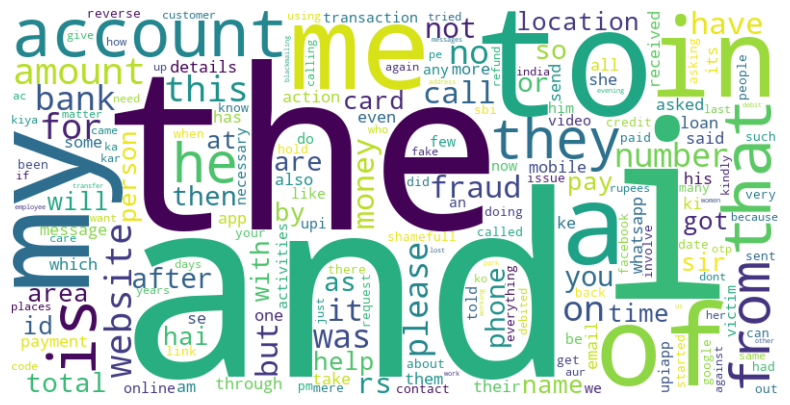

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

all_text = ' '.join(train['crimeaditionalinfo'].dropna())
all_text = re.sub(r'[^\w\s]', '', all_text)
word_counts = Counter(all_text.lower().split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88296 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            88296 non-null  object
 1   sub_category        81705 non-null  object
 2   crimeaditionalinfo  88296 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [32]:
# Group by 'category' and aggregate unique subcategories into lists
train_category_mapping = train.groupby('category')['sub_category'].apply(lambda x: list(set(x))).to_dict()
pprint.pprint(train_category_mapping, width=80)
print("Number of mappings: ", len(train_category_mapping))

{'Any Other Cyber Crime': ['Other'],
 'Child Pornography CPChild Sexual Abuse Material CSAM': [nan],
 'Cryptocurrency Crime': ['Cryptocurrency Fraud'],
 'Cyber Attack/ Dependent Crimes': ['Tampering with computer source documents',
                                    'Hacking/Defacement',
                                    'SQL Injection',
                                    'Denial of Service (DoS)/Distributed '
                                    'Denial of Service (DDOS) attacks',
                                    'Ransomware Attack',
                                    'Data Breach/Theft',
                                    'Malware Attack'],
 'Cyber Terrorism': ['Cyber Terrorism'],
 'Hacking  Damage to computercomputer system etc': ['Tampering with computer '
                                                    'source documents',
                                                    'Website DefacementHacking',
                                                    'Email Hacking',

In [33]:
test_category_mapping = test.groupby('category')['sub_category'].apply(lambda x: list(set(x))).to_dict()
pprint.pprint(test_category_mapping, width=80)
print("\nNumber of mappings: ", len(test_category_mapping))

{'Any Other Cyber Crime': ['Other'],
 'Child Pornography CPChild Sexual Abuse Material CSAM': [nan],
 'Crime Against Women & Children': ['Sexual Harassment',
                                    'Computer Generated CSAM/CSEM',
                                    'Cyber Blackmailing & Threatening'],
 'Cryptocurrency Crime': ['Cryptocurrency Fraud'],
 'Cyber Attack/ Dependent Crimes': ['Tampering with computer source documents',
                                    'Hacking/Defacement',
                                    'SQL Injection',
                                    'Denial of Service (DoS)/Distributed '
                                    'Denial of Service (DDOS) attacks',
                                    'Ransomware Attack',
                                    'Data Breach/Theft',
                                    'Malware Attack'],
 'Cyber Terrorism': ['Cyber Terrorism'],
 'Hacking  Damage to computercomputer system etc': ['Tampering with computer '
                       

In [34]:
unique_category_mapping_sets = {category: set(subcategories) for category, subcategories in train_category_mapping.items()}

identical_categories = {}
for category1, subcategories1 in unique_category_mapping_sets.items():
    for category2, subcategories2 in unique_category_mapping_sets.items():
        if category1 != category2 and subcategories1 == subcategories2:
            identical_categories.setdefault(frozenset([category1, category2]), subcategories1)

identical_categories

{frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'RapeGang Rape RGRSexually Abusive Content'}): {nan},
 frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'Sexually Explicit Act'}): {nan},
 frozenset({'Child Pornography CPChild Sexual Abuse Material CSAM',
            'Sexually Obscene material'}): {nan},
 frozenset({'RapeGang Rape RGRSexually Abusive Content',
            'Sexually Explicit Act'}): {nan},
 frozenset({'RapeGang Rape RGRSexually Abusive Content',
            'Sexually Obscene material'}): {nan},
 frozenset({'Sexually Explicit Act', 'Sexually Obscene material'}): {nan}}

In [35]:
train[(train['category'] == 'Sexually Obscene material') & (train['sub_category'].isna() == True)].head(3)

,category,sub_category,crimeaditionalinfo
45,Sexually Obscene material,NaN,many fake accounts are created and im suffering since year vulgar language chatting in instagram with my friends and family members and they are also suffering by this issue in kindly requesting to you help me its my humble request
94,Sexually Obscene material,NaN,in twitter we have seen illegally publishing and transmitting sexual photocopy of girls in twitter they is big group transmitting girls photo most of them are affected by this group help this stop this in social media
122,Sexually Obscene material,NaN,someone post my nude on instagram and when i asked about then he told that anyone share my picture for post and when i asked about who is behind this he told me that he sind not remember anything please help me this is very serious for me


In [36]:
sexual_abuse_categories = [
    'Sexually Obscene material', 
    'Sexually Explicit Act', 
    'RapeGang Rape RGRSexually Abusive Content', 
    'Child Pornography CPChild Sexual Abuse Material CSAM'
]

combined_subcategory = ", ".join(sexual_abuse_categories)
train['sub_category'] = train.apply(lambda row: row['category'] if row['category'] in sexual_abuse_categories else row['sub_category'], axis=1)
train['category'] = train['category'].apply(lambda x: "Sex Abuse" if x in sexual_abuse_categories else x)
test['sub_category'] = test.apply(lambda row: row['category'] if row['category'] in sexual_abuse_categories else row['sub_category'], axis=1)
test['category'] = test['category'].apply(lambda x: "Sex Abuse" if x in sexual_abuse_categories else x)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88296 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            88296 non-null  object
 1   sub_category        88296 non-null  object
 2   crimeaditionalinfo  88296 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [38]:
train[(train['category'] == 'Sex Abuse')].head(3)

,category,sub_category,crimeaditionalinfo
8,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,i got the message on whatsapp to my number the message contains very abusive words this message also includes my friend name and his number in that the same message was forwarded to all other friends also for more details please look into the file attached here please take action as soon as possible
25,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,respected sir a very serious matter i want to inform you few person running or involve in some very shamefull activities by using few women at many places of kolkata LOCATION ballygunge ruby hospital behind area kasba anandapur quest LOCATION metropolis LOCATION area acropolismall area park circus forum LOCATION elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake LOCATION area rashbehari area tollygunge thakurpukur bbd bag dalhousie area and saltlake their name subhro saha amlan datta izaz ahmed anirban they officially work in a insurance office hdfclife a hindustanpark ab LOCATION shopping LOCATION st floor beside of reliance trend building near LOCATION more but outside at several places they involve in some shamefull activities last years sir a person subhro saha forcefully involve few women employee ex female employee in such shamefull doing at afternoon evening or after evening or night time they doing this shamefull activities many innocent people are trapped and suffering in such dirty issue for long time they are even to lodge a WEBSITE against them because of threatening and blackmailing issue from above address places and their mobile whatsapp no you can easily trace and track their all activities you need to investigate last years detail please help
39,Sex Abuse,Sexually Explicit Act,WEBSITE above link is correct video url she is one of our relative please help her now she is going to get marry other person they are not aware of this information while its recording some malwere functionality has recorded without their permission please help her and remove the above video


In [39]:
len(train[train['crimeaditionalinfo'].str.contains('LOCATION')])

5592

In [40]:
train[train['crimeaditionalinfo'].str.count("LOCATION") > 1].head(3)

,category,sub_category,crimeaditionalinfo
22,Online Gambling Betting,Online Gambling Betting,respected cyber crime LOCATION east mumbai this is irshad gafur shaikh i reside in LOCATION east with my family and i am responsible citizen of india and my family i would like to highlight you about two fruadulant loan app which are quitely robbing to innocent and family responsible people like me koko loan i was looking for ke then filling my personal details it showed ke then i clicked to check tenurity and roi it directly selected as applied itself and credited into my account of rs and repayment amount is showing as ke with days tenurity screen shots shared for your reference ag loan i was looking for ke loan as per the app given limit for days tenurity and i applied for the same then next it credited rs into my bank account as showing repayment of ke with days tenurity screen shots and recording shared for your reference none of the above have mentioned contact center or points i tried to contact them also however its all scam i heartly request you to help me out from the same i am from middle class and i already having many family responaiblity i am ready for the same credited amount only but they are not acknowledging that
25,Sex Abuse,RapeGang Rape RGRSexually Abusive Content,respected sir a very serious matter i want to inform you few person running or involve in some very shamefull activities by using few women at many places of kolkata LOCATION ballygunge ruby hospital behind area kasba anandapur quest LOCATION metropolis LOCATION area acropolismall area park circus forum LOCATION elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake LOCATION area rashbehari area tollygunge thakurpukur bbd bag dalhousie area and saltlake their name subhro saha amlan datta izaz ahmed anirban they officially work in a insurance office hdfclife a hindustanpark ab LOCATION shopping LOCATION st floor beside of reliance trend building near LOCATION more but outside at several places they involve in some shamefull activities last years sir a person subhro saha forcefully involve few women employee ex female employee in such shamefull doing at afternoon evening or after evening or night time they doing this shamefull activities many innocent people are trapped and suffering in such dirty issue for long time they are even to lodge a WEBSITE against them because of threatening and blackmailing issue from above address places and their mobile whatsapp no you can easily trace and track their all activities you need to investigate last years detail please help
40,Online Gambling Betting,Online Gambling Betting,his name is avaneesh parasar staying in LOCATION at flat ranjan LOCATION magistrate colony LOCATION LOCATION road post aashiyana nagar thana rajiv nagar dis LOCATION pin code he took crores of rupees from thousands on people all over india for trading in bitcoin and promised to return with profit capital amount but now he is not returning and arguing and using slangs when we are asking for our own money we are figiting with him from with him and everytime he keeps giving the reason for each and everything and keeps figting for not retrning the money we are very tired of all this and need to catch him at the earliest many people are not WEBSITE due to scared of losing their money even avaneesh says frankly to WEBSITE to police or move with legal action as police cant do anything to him it seems he is very confident about the police is not going to do anything to him we are struggling lot with him as he is not returning our amount atleast request you to spread awareness in media to save many people from him along with him his partner sanjana and anjalli calling many people and inviting to join his online fraud business and they are taking many people money and not returning theier capital also people have to fight to get their own money from him now he also r

In [41]:
def consolidate_location_tags(text):
    if isinstance(text, str):
        # This regex finds the first "LOCATION" and the last "LOCATION" and removes everything in between
        text = re.sub(r'LOCATION.*LOCATION', 'LOCATION', text)
    return text

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].apply(consolidate_location_tags)
test['crimeaditionalinfo'] = test['crimeaditionalinfo'].apply(consolidate_location_tags)

In [42]:
for column in train['sub_category'].unique():
    if column not in test['sub_category'].unique():
        print(column)

Against Interest of sovereignty or integrity of India


In [43]:
for column in test['sub_category'].unique():
    if column not in train['sub_category'].unique():
        print(column)

Computer Generated CSAM/CSEM
Cyber Blackmailing & Threatening
Sexual Harassment


In [44]:
for column in train['category'].unique():
    if column not in test['category'].unique():
        print(column)

Report Unlawful Content


In [45]:
for column in test['category'].unique():
    if column not in train['category'].unique():
        print(column)

Crime Against Women & Children


In [46]:
train = train[train['category'] != "Against Interest of sovereignty or integrity of India"]

In [47]:
def preprocess_text(text):
    # Add spaces around punctuation
    text = re.sub(r"([.,!?;:])", r" \1 ", text)
    # Remove any extra whitespace
    text = re.sub(r"\s{2,}", " ", text)
    return text.strip()

# Apply preprocessing
# train["crimeaditionalinfo"] = train["crimeaditionalinfo"].apply(preprocess_text)
# test["crimeaditionalinfo"] = test["crimeaditionalinfo"].apply(preprocess_text)

In [48]:
test[test['category'] == "Crime Against Women & Children"]

,category,sub_category,crimeaditionalinfo
2762,Crime Against Women & Children,Computer Generated CSAM/CSEM,"my friend mentioned something like this happened to them a few months ago, but i thought it was a one-off. then, suddenly, i got this weird notification asking me to update my password, but the message didn’t look like the usual ones i receive from the app. it looked a bit off. looking back, maybe i should have paid more attention to the little details, but now it's too late. my accounts are WEBSITE. the more i tried to fix it, the more problems came up. my bank account was notifiction, and then i got locked out of everything. this has really left me anxious and frustrated, i can’t sleep knowing my information is out there. i’ve even considered deleting all my accounts, but that’s not a solution. even my tablet isn’t working right anymore. it’s so stange how everything just fell apart after that one email."
9517,Crime Against Women & Children,Computer Generated CSAM/CSEM,"the issue actually started when i got this email, which at first glance seemed like spam. i usually ignore such things, but for some reason, i opened it this time. afterward, my phone started freezing, and it wasn’t normal. i thought it was a technical glitch, but now i’m not so sure. honestly, it’s such a mess, and i don’t even know where to start. i’ve contacted support, but they keep giving me the runaround. the more i tried to fix it, the more problems came up. my email was notifiction, and then i got locked out of everything. the worst part is, i don’t even know who to trust anymore. friends, family, everyone’s acting strange. it’s affecting my relationships and my mental health. even my tablet isn’t working right anymore. it’s so stange how everything just fell apart after that one email."
14779,Crime Against Women & Children,Cyber Blackmailing & Threatening,"my friend mentioned something like this happened to them a few months ago, but i thought it was a one-off. then, suddenly, i got this weird notification asking me to update my password, but the message didn’t look like the usual ones i receive from the app. it looked a bit off. looking back, maybe i should have paid more attention to the little details, but now it's too late. my accounts are WEBSITE. the more i tried to fix it, the more problems came up. my social media was hackd, and then i got locked out of everything. this has really left me anxious and frustrated, i can’t sleep knowing my information is out there. i’ve even considered deleting all my accounts, but that’s not a solution. even my tablet isn’t working right anymore. it’s so stange how everything just fell apart after that one email."
19725,Crime Against Women & Children,Sexual Harassment,"i never imagined something like this could happen to me, especially since i'm so cautious. but then i started noticing that my online activity felt different, slower even. i can't even describe it well because everything seemed normal, except for the fact that i was constantly getting logged out of my accounts. it’s hard to explain, but it felt like someone was inside my account, doing things while i wasn’t even online. the more i tried to fix it, the more problems came up. my social media was recived, and then i got locked out of everything. i don’t think i’ve ever felt this violated before. my privacy is WEBSITE shattered, and i can’t do anything to make it stop. even my laptop isn’t working right anymore. it’s so stange how everything just fell apart after that one email."


In [49]:
rows_to_replace = [2762, 9517, 14779, 19725]

test.loc[rows_to_replace, 'category'] = 'Hacking Damage to computer system etc'
test.loc[rows_to_replace, 'sub_category'] = 'Email Hacking'

In [50]:
train_duplicates_in_test = train['crimeaditionalinfo'].isin(test['crimeaditionalinfo']).sum()
test_duplicates_in_train = test['crimeaditionalinfo'].isin(train['crimeaditionalinfo']).sum()

train_duplicates_in_test, test_duplicates_in_train

(9992, 4192)

In [51]:
# Checking the unique overlaps by removing duplicates within each dataset
train = train.drop_duplicates(subset='crimeaditionalinfo')
test = test.drop_duplicates(subset='crimeaditionalinfo')

# Counting overlaps by checking each unique set against the other
train_in_test_overlap = train['crimeaditionalinfo'].isin(test['crimeaditionalinfo']).sum()
test_in_train_overlap = test['crimeaditionalinfo'].isin(train['crimeaditionalinfo']).sum()

train_in_test_overlap, test_in_train_overlap

(1316, 1316)

In [52]:
train = train[~train['crimeaditionalinfo'].isin(test['crimeaditionalinfo'])]

In [53]:
def check_vocab(c_list, vocabulary, response='default'):
    try:
        words = set([w for line in c_list for w in line.split()])
        u_list = words.difference(set(vocabulary))
        k_list = words.difference(u_list)

        if response == 'default':
            print('Unknown words:', len(u_list), '| Known words:', len(k_list))
        elif response == 'unknown_list':
            return list(u_list)
        elif response == 'known_list':
            return list(k_list)
    except:
        return []

In [54]:
def process_text(df, contractions_dict, verbose=True):
    # Step 1: Add spaces before punctuation
    def space_punctuations(text):
        return ''.join([' ' + char if not char.isalnum() and char != ' ' else char for char in text])

    # Step 2: Handle contractions
    def expand_contractions(text, contractions):
        return ' '.join([contractions.get(word, word) for word in text.split()])

    # Step 3: Handle multiple forms (convert plural to singular if singular exists)
    def handle_multiple_forms(text, local_vocab):
        words = text.split()
        return ' '.join([word[:-1] if word.endswith('s') and word[:-1] in local_vocab else word for word in words])

    # Load your vocabulary (this can be dynamic or predefined)
    local_vocab = set(word for text in df['crimeaditionalinfo'] for word in text.split())

    # Apply transformations
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].fillna('')  # Ensure no NaN values
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(space_punctuations)
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(lambda x: expand_contractions(x, contractions_dict))
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].str.replace("'", "", regex=False)
    df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(lambda x: handle_multiple_forms(x, local_vocab))

    if verbose:
        print("Processing complete!")
    return df

# Example contractions dictionary
contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "must've": "must have",
    "needn't": "need not",
    "o'clock": "of the clock",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "why's": "why is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "'cause": "because",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "it'd've": "it would have",
    "he'd've": "he would have",
    "she'd've": "she would have",
    "we'd've": "we would have",
    "they'd've": "they would have",
    "you'd've": "you would have",
    "let's": "let us",
    "y'all": "you all",
    "y'alls": "you alls",
    "dunno": "do not know",
    "gimme": "give me",
    "gonna": "going to",
    "gotta": "got to",
    "wanna": "want to",
    "lemme": "let me",
    "outta": "out of",
    "kinda": "kind of",
    "sorta": "sort of"
}

# Example usage
train = process_text(train, contractions_dict)
test = process_text(test, contractions_dict)

Processing complete!
Processing complete!


In [55]:
len(set(word for text in train['crimeaditionalinfo'] for word in text.split()))

98887

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76837 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            76837 non-null  object
 1   sub_category        76837 non-null  object
 2   crimeaditionalinfo  76837 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [57]:
import wandb
wandb.login(key="fb2d459e0c79a2cb4494c886db4b759d222d1261")  # Use the correct string format

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [58]:
# Import necessary libraries
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)
from datasets import Dataset
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Split the train data into training and validation sets
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

# Convert DataFrames to Datasets
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test.reset_index(drop=True))

# Load MPNet-v2 tokenizer and model
model_name = "sentence-transformers/all-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(train['sub_category'].unique())
)
model.to(device)  # Move model to GPU if available

# Convert label column to numeric IDs
label_list = train['sub_category'].unique().tolist()
label_to_id = {label: i for i, label in enumerate(label_list)}
id_to_label = {i: label for label, i in label_to_id.items()}

def encode_labels(example):
    example['labels'] = label_to_id[example['sub_category']]
    return example

train_dataset = train_dataset.map(encode_labels)
val_dataset = val_dataset.map(encode_labels)
test_dataset = test_dataset.map(encode_labels)

# Determine the maximum sequence length
max_length = tokenizer.model_max_length
if max_length > 1e5:  # If model_max_length is not set properly
    max_length = 512  # Set it to 512 manually

# Tokenize the datasets with max_length set
def tokenize_function(examples):
    return tokenizer(
        examples["crimeaditionalinfo"],
        truncation=True,
        max_length=max_length,
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# Define the data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted', zero_division=0)
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,  # Adjusted based on validation performance
    weight_decay=0.01,
    logging_dir="./logs",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    no_cuda=not torch.cuda.is_available(),  # Use GPU if available
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Use the validation dataset here
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Train the model
trainer.train()

# Evaluate the model on the test set
print("Evaluating on the test set...")
test_results = trainer.evaluate(test_dataset)
print(test_results)

# Save the fine-tuned model and tokenizer
model.save_pretrained("./mpnet-classification")
tokenizer.save_pretrained("./mpnet-classification")

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-mpnet-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/69153 [00:00<?, ? examples/s]

Map:   0%|          | 0/7684 [00:00<?, ? examples/s]

Map:   0%|          | 0/27065 [00:00<?, ? examples/s]

Map:   0%|          | 0/69153 [00:00<?, ? examples/s]

Map:   0%|          | 0/7684 [00:00<?, ? examples/s]

Map:   0%|          | 0/27065 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: satvshr (satvshr-amrita-vishwa-vidyapeetham). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /kaggle/working/wandb/run-20241117_115117-7z1bw31k
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ./results
wandb: ⭐️ View project at https://wandb.ai/satvshr-amrita-vishwa-vidyapeetham/huggingface
wandb: 🚀 View run at https://wandb.ai/satvshr-amrita-vishwa-vidyapeetham/huggingface/runs/7z1bw31k


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.657900,1.641952,0.496096,0.442595,0.432107,0.496096
2,1.534600,1.548078,0.517959,0.482407,0.487163,0.517959
3,1.415900,1.557590,0.516007,0.479592,0.492741,0.516007
4,1.273700,1.601615,0.516658,0.486527,0.494978,0.516658
5,1.163600,1.696364,0.508719,0.483345,0.472522,0.508719
6,1.030100,1.800322,0.507028,0.483675,0.477530,0.507028
7,0.890500,1.965461,0.499870,0.473262,0.471804,0.499870


Evaluating on the test set...


{'eval_loss': 1.5602139234542847, 'eval_accuracy': 0.5266580454461481, 'eval_f1': 0.49540167312854494, 'eval_precision': 0.4951909231654443, 'eval_recall': 0.5266580454461481, 'eval_runtime': 224.5245, 'eval_samples_per_second': 120.544, 'eval_steps_per_second': 7.536, 'epoch': 7.0}


('./mpnet-classification/tokenizer_config.json',
 './mpnet-classification/special_tokens_map.json',
 './mpnet-classification/vocab.txt',
 './mpnet-classification/added_tokens.json',
 './mpnet-classification/tokenizer.json')

In [59]:
# Import necessary libraries
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)
from datasets import Dataset
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Split the train data into training and validation sets
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

# Convert DataFrames to Datasets
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test.reset_index(drop=True))

# Load RoBERTa tokenizer and model
model_name = "roberta-base"  # Replace with other RoBERTa variants if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(train['sub_category'].unique())
)
model.to(device)  # Move model to GPU if available

# Convert label column to numeric IDs
label_list = train['sub_category'].unique().tolist()
label_to_id = {label: i for i, label in enumerate(label_list)}
id_to_label = {i: label for label, i in label_to_id.items()}

def encode_labels(example):
    example['labels'] = label_to_id[example['sub_category']]
    return example

train_dataset = train_dataset.map(encode_labels)
val_dataset = val_dataset.map(encode_labels)
test_dataset = test_dataset.map(encode_labels)

# Determine the maximum sequence length
max_length = tokenizer.model_max_length
if max_length > 1e5:  # If model_max_length is not set properly
    max_length = 512  # Set it to 512 manually

# Tokenize the datasets with max_length set
def tokenize_function(examples):
    return tokenizer(
        examples["crimeaditionalinfo"],
        truncation=True,
        max_length=max_length,
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# Define the data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted', zero_division=0)
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,  # Adjusted based on validation performance
    weight_decay=0.01,
    logging_dir="./logs",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    no_cuda=not torch.cuda.is_available(),  # Use GPU if available
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Use the validation dataset here
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Train the model
trainer.train()

# Evaluate the model on the test set
print("Evaluating on the test set...")
test_results = trainer.evaluate(test_dataset)
print(test_results)

# Save the fine-tuned model and tokenizer
model.save_pretrained("./roberta-classification")
tokenizer.save_pretrained("./roberta-classification")

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/69153 [00:00<?, ? examples/s]

Map:   0%|          | 0/7684 [00:00<?, ? examples/s]

Map:   0%|          | 0/27065 [00:00<?, ? examples/s]

Map:   0%|          | 0/69153 [00:00<?, ? examples/s]

Map:   0%|          | 0/7684 [00:00<?, ? examples/s]

Map:   0%|          | 0/27065 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
A ConfigError was raised whilst setting the number of model parameters in Weights & Biases config.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.632000,1.635797,0.497137,0.454730,0.461750,0.497137
2,1.543400,1.554763,0.514055,0.479603,0.482393,0.514055
3,1.442100,1.566005,0.516268,0.481777,0.491540,0.516268
4,1.335200,1.572452,0.514576,0.485661,0.487049,0.514576
5,1.245500,1.624273,0.516007,0.487449,0.489132,0.516007
6,1.117900,1.688976,0.517829,0.491334,0.492890,0.517829
7,0.998900,1.827268,0.501822,0.481377,0.479158,0.501822
8,0.880100,1.896224,0.495055,0.480610,0.484844,0.495055
9,0.772000,2.041566,0.493493,0.480985,0.481058,0.493493


Evaluating on the test set...


{'eval_loss': 1.6643526554107666, 'eval_accuracy': 0.5243303159061519, 'eval_f1': 0.49855907434259866, 'eval_precision': 0.4972130268416062, 'eval_recall': 0.5243303159061519, 'eval_runtime': 208.2355, 'eval_samples_per_second': 129.973, 'eval_steps_per_second': 8.125, 'epoch': 9.0}


('./roberta-classification/tokenizer_config.json',
 './roberta-classification/special_tokens_map.json',
 './roberta-classification/vocab.json',
 './roberta-classification/merges.txt',
 './roberta-classification/added_tokens.json',
 './roberta-classification/tokenizer.json')